In [2]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib as mpl

my_dateparser = lambda x: pd.datetime.strptime(x, "%Y %m %d %H %M")

path = 'shared-ns1000k/inputs/Aerosol_sizedist_obs/' 
all_files = glob.glob(path + "/ALERT_201*_hourly.csv")


myorder = [2, 1, 0]
mylist = [all_files[i] for i in myorder]
  
li = []

for filename in mylist:
    df = pd.read_csv(filename, parse_dates=[['0', '0.1', '0.2', '0.3', '0.4']], date_parser = my_dateparser)
    li.append(df)


df = pd.concat(li, axis=0, ignore_index=True)

df.rename(columns={'0_0.1_0.2_0.3_0.4':'Time'},inplace = True)
df.replace(-999, np.nan, inplace=True)
df.drop(labels=['0.5','0.6'], axis=1, inplace=True)
df = df.set_index('Time')
df

,20,22.44,25.179,28.251,31.698,35.566,39.905,44.774,50.238,56.368,...,178.25,200,224.4,251.79,282.51,316.98,355.66,399.05,447.74,502.38
Time,,,,,,,,,,,,,,,,,,,,,
2011-03-09 17:00:00,3.3445,8.045,13.866,21.003,28.447,39.927,51.982,63.703,79.670,85.088,...,311.72,290.10,255.67,211.08,165.99,119.020,73.452,43.607,23.425,8.4638
2011-03-09 18:00:00,4.8833,10.524,15.432,20.768,28.467,41.422,52.083,58.478,75.990,79.277,...,295.35,269.51,228.55,189.06,142.27,102.080,63.478,37.759,20.441,7.6548
2011-03-09 19:00:00,6.3406,10.776,15.885,23.361,28.971,38.983,48.910,59.262,70.109,78.992,...,282.68,260.59,214.83,169.40,126.08,88.288,57.421,33.223,17.924,1.3050
2011-03-09 20:00:00,6.2400,10.927,15.791,24.441,30.602,38.621,44.506,56.345,68.949,79.314,...,285.11,247.82,209.27,154.78,119.68,80.829,54.092,33.785,17.973,4.9442
2011-03-09 21:00:00,4.9639,10.088,13.454,22.094,28.368,36.623,44.544,57.107,70.272,79.959,...,288.24,254.88,216.97,163.78,123.32,85.730,53.396,34.907,19.318,3.9253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
diam = df.columns
diam = ([float(ii) for ii in diam])
time = df.index
data = xr.DataArray(df.values,dims={'Time':time, 'Diameter':diam})
datas = xr.Dataset({'SizeDist':data})
datas['Time']=time
datas['Diameter']=diam

/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


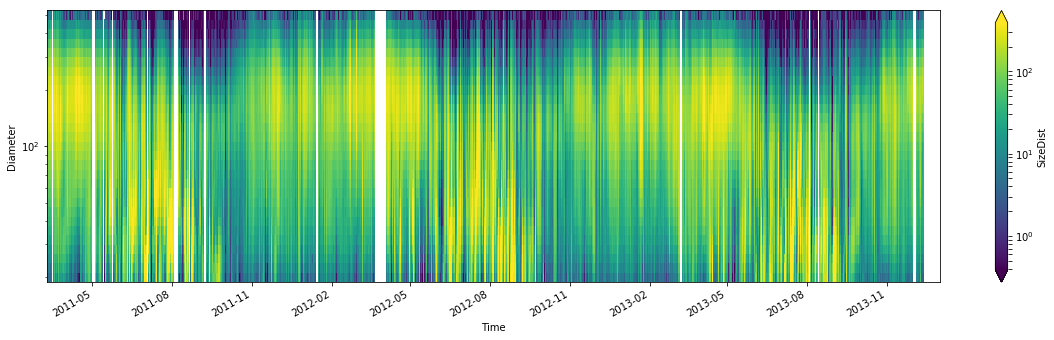

In [4]:
plt.figure(figsize=(20,5))
datas['SizeDist'].plot(x='Time', robust=True, yscale='log', norm=mpl.colors.LogNorm())

In [5]:
df_weekly = df.resample('w').mean()

In [6]:
diam = df_weekly.columns
diam = ([float(ii) for ii in diam])
time = df_weekly.index
data_w = xr.DataArray(df_weekly.values,dims={'Time':time, 'Diameter':diam})
datas_w = xr.Dataset({'SizeDist':data_w})
datas_w['Time']=time
datas_w['Diameter']=diam

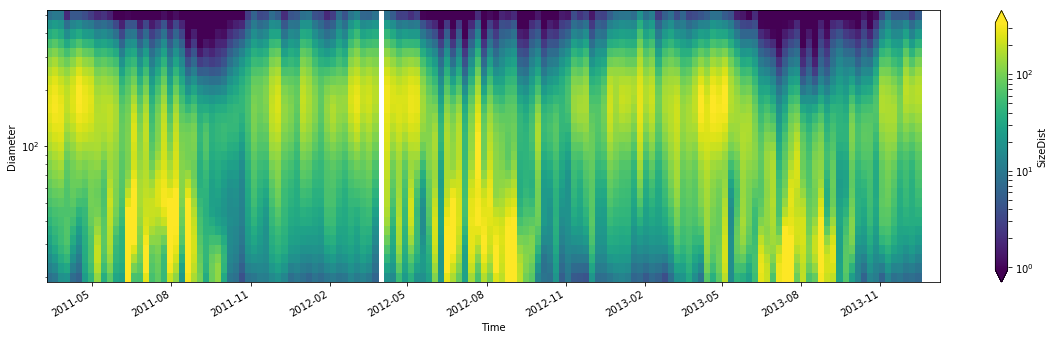

In [7]:
plt.figure(figsize=(20,5))
datas_w['SizeDist'].plot(x='Time', robust=True, yscale='log', norm=mpl.colors.LogNorm())